# Estadistica inferencial no paramétrica: Prueba de Kruskal Wallis

Es el primo no paramétrico del ANOVA de una vía.
Análisis estádistico no paramétrico muy util para comparar mas de dos grupos independientes con datos no normalizados.

#### **¿Qué hace?**


- Compara 3 o más grupos independientes para ver si al menos uno de ellos tiene una distribución diferente en la mediana.

- En lugar de comparar medias (como el ANOVA clásico), compara los rangos de los datos (igual que el Mann–Whitney pero extendido a más grupos).

#### **Supuestos**

- Grupos independientes.

- Variables medidas al menos en escala ordinal (sirve también para continuas).

- No requiere normalidad (por eso es no paramétrica).

#### **Hipótesis**

- H₀ (nula): las k muestras provienen de la misma población (o distribuciones iguales en mediana).

- H₁ (alternativa): al menos un grupo difiere.



In [21]:
import pandas as pd 

def import_csv(file):
    return pd.read_csv(file)

path = "../../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

CO2Data = import_csv(path)

## **Kruskal Wallis prueba-H para muestras independientes**

In [22]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha = 0.05):
    # se pone el *groups porque aqui se puden añadir mas variables
    # sin necesidad de crear otras funciones 
    # ejemplo:
    # para tres, cuatro o n variables se usa la misma función 
    result = kruskal(*groups)

    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("La diferencia entre grupos es estadisticamente significativa")
    else:
        print("La diferencia entre grupos NO es estadisticamente significativa")


## **Comparaciones post-hocs**

Cuando se hace un test global como ANOVA o Kruskal-Wallis, la hipótesis nula es que *todas* las medias (o medianas, según el caso) de los grupos son iguales

- Si el p-valor > 0.05 → concluyes que no hay diferencias significativas entre los grupos (y ahí se acaba el asunto).

- Si el p-valor < 0.05 → sabes que al menos un grupo es distinto, pero no sabes cuál.

Ahí entran las comparaciones post-hoc: son pruebas adicionales que comparan pareja por pareja (G1 vs G2, G1 vs G3, G2 vs G3, etc.) corrigiendo el error estadístico por hacer muchas pruebas a la vez.

In [32]:
import scikit_posthocs as sp

def dunn_poshoc(data, group_col, value_col, p_adjust='bonferroni'):
    results = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(results)
    return results

En general, cuando haces comparaciones post-hoc necesitas corregir el p-valor porque estás haciendo muchas pruebas al mismo tiempo y aumenta el riesgo de falsos positivos (error tipo I).

Por eso existe el argumento p_adjust en librerias como scikit-posthocs

#### Bonferroni

-Divide el nivel de significancia (α) entre el número de comparaciones.

-Muy conservador (reduce falsos positivos, pero aumenta falsos negativos).

> Ejemplo: si α=0.05 y haces 10 comparaciones → α_corr = 0.005.

#### Holm (Holm–Bonferroni)

- Más “suave” que Bonferroni.

- Ajusta los p-valores en orden secuencial, es menos estricto.

#### FDR / Benjamini–Hochberg (False Discovery Rate)

- Controla la tasa de descubrimientos falsos.

- Más permisivo, muy usado en biología, química y análisis de datos grandes (ej. genómica).

#### Šidák

- Parecido a Bonferroni, pero usa otra fórmula:

$$\alpha_{corr}=1−(1−\alpha)^{1/k}$$

donde k = número de comparaciones.

#### Holm–Šidák

#### Benjamini–Yekutieli (una versión más conservadora del FDR).

#### Step-down o step-up según el orden de los p-valores.

## Es recomendable hacer los boxplots para ver la diferencia 

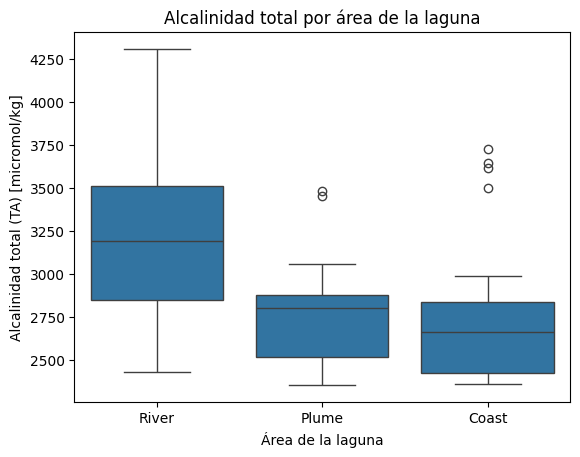

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='ta_micromol_kg', data=CO2Data)
plt.xlabel("Área de la laguna")
plt.ylabel("Alcalinidad total (TA) [micromol/kg]")
plt.title("Alcalinidad total por área de la laguna")
plt.show()

In [25]:
# Seleccionamos los datos de cada área de la laguna

ta_river = CO2Data[CO2Data['area'] == 'River']['ta_micromol_kg']
ta_plume = CO2Data[CO2Data['area'] == 'Plume']['ta_micromol_kg']
ta_coast = CO2Data[CO2Data['area'] == 'Coast']['ta_micromol_kg']

# en la base de datos donde la condición area es igual a river o pluma o costa dame la alcaliniad total

#### **Interpretación del Kruskal Wallis Test**

In [26]:
kruskal_wallis_test(ta_river, ta_plume, ta_coast)

H statistic = 23.340675555846637
p-value = 8.543517259038796e-06
La diferencia entre grupos es estadisticamente significativa


#### **Como es estadisticamente significativa metemos el post hocs**

In [33]:
dunn_poshoc(CO2Data, 'area', 'ta_micromol_kg')

          Coast     Plume     River
Coast  1.000000  1.000000  0.000016
Plume  1.000000  1.000000  0.000659
River  0.000016  0.000659  1.000000


,Coast,Plume,River
Coast,1.000000,1.000000,0.000016
Plume,1.000000,1.000000,0.000659
River,0.000016,0.000659,1.000000


## **Interpretación**

- Para interpretarla en la diagonal de la matriz siempre será 1 porque es la comparación del grupo consigo mismo. No tiene sentido interpretarla.

- Coast vs Plume = 1.0 No hay diferencia significativa entre las variables
- Coast vs River = 0.000016 Tiene una diferncia altamente significativa porque p < 0.001
- Plume vs River = 0.000659 Diferenica significativa p < 0.001

### **Conclusiones**

- River es claramente distinto de Coast y Plume
- Coast y Plume son prácticamente iguales según los datos